In [3]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.dates import DateFormatter, AutoDateLocator
import plotly.express as px
import plotly.offline as offline
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from windrose import WindroseAxes


In [4]:
# Import Wind Sensor data
Sensor_Wind = pd.read_csv('/Users/juanbettinelli/Documents/Uni/MasterThesis/4_Scrips_and_Data/4_Data/10_2024_Data/Windsensor/Merged_Wind_Measuments.csv')
# Formate the date column to datetime
Sensor_Wind['UTC'] = pd.to_datetime(Sensor_Wind['UTC'])

In [5]:
# Import Wind Sensor data
Aeris_Data = pd.read_csv('/Users/juanbettinelli/Documents/Uni/MasterThesis/4_Scrips_and_Data/4_Data/10_2024_Data/Aeris/2024_Hamburg_Aeris.csv', low_memory=False)

Aeris_Data.rename(columns={'Time Stamp': 'UTC'}, inplace=True)
# Formate the date column to datetime
Aeris_Data['UTC'] = pd.to_datetime(Aeris_Data['UTC'])


In [6]:
Mobile_Data = []
Mobile_Data = pd.merge(Aeris_Data, Sensor_Wind, on='UTC', how='outer')

print(Mobile_Data.columns)
print(Sensor_Wind.columns)


Index(['UTC', 'Inlet Number', 'P (mbars)', 'T0 (degC)', 'T1 (degC)',
       'T2 (degC)', 'T5 (degC)', 'Tgas(degC)', 'CH4 (ppm)', 'H2O (ppm)',
       'C2H6 (ppb)', 'R', 'C2/C1', 'Battery Charge (V)', 'Power Input (mV)',
       'Current (mA)', 'SOC (%)', 'TEC Sink Temp (degC)', 'Wall Code',
       'Latitude', 'Longitude', 'Time', 'Sensor_Wind_Speed',
       'Sensor_Wind_Direction'],
      dtype='object')
Index(['UTC', 'Sensor_Wind_Speed', 'Sensor_Wind_Direction'], dtype='object')


In [7]:
# Create figure with subplots
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=('CH4' , 'C2H6' ,'Sensor Wind Direction', 'Sensor Wind Speed'), vertical_spacing=0.05)
# Add trace for the second DataFrame to the second subplot
fig.add_trace(go.Scatter(x=Mobile_Data['UTC'], y=Mobile_Data['CH4 (ppm)'], mode='lines', name='CH4 (ppm)'), row=1, col=1)

fig.add_trace(go.Scatter(x=Mobile_Data['UTC'], y=Mobile_Data['C2H6 (ppb)'], mode='lines', name='C2H6 (ppb)'), row=2, col=1)

# Add trace for the second DataFrame to the second subplot
fig.add_trace(go.Scatter(x=Mobile_Data['UTC'], y=Mobile_Data['Sensor_Wind_Direction'], mode='lines', name='Direction'), row=3, col=1)

fig.add_trace(go.Scatter(x=Mobile_Data['UTC'], y=Mobile_Data['Sensor_Wind_Speed'], mode='lines', name='Velocity'), row=4, col=1)

# Update layout
fig.update_layout(height=1200, width=1600, title_text="Geomatikum Plot", showlegend=False)

# Show figure
#fig.show()
offline.plot(fig, filename='/Users/juanbettinelli/Documents/Uni/MasterThesis/4_Scrips_and_Data/4_Data/OutputData/Plots/27_2024_Wind_Sensor_Plot.html', auto_open=False)


'/Users/juanbettinelli/Documents/Uni/MasterThesis/4_Scrips_and_Data/4_Data/OutputData/Plots/27_2024_Wind_Sensor_Plot.html'

'/Users/juanbettinelli/Documents/Uni/MasterThesis/4_Scrips_and_Data/4_Data/OutputData/Plots/28_2024_Wind_Sensor_Rose_Plot.html'

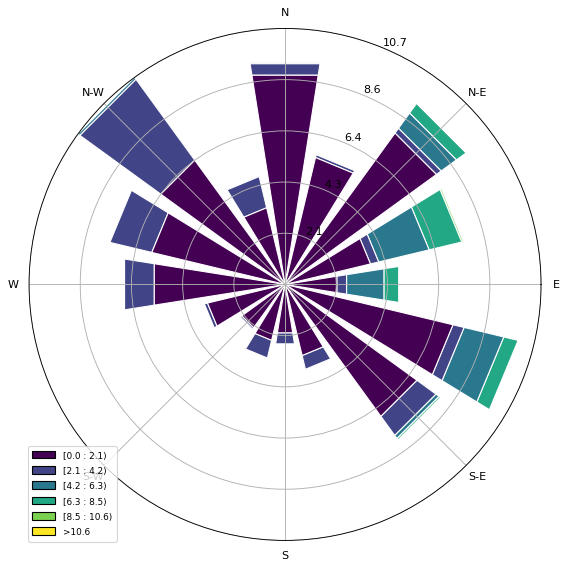

In [8]:
# Create wind speed and direction variables

wd = Sensor_Wind['Sensor_Wind_Direction']
ws = Sensor_Wind['Sensor_Wind_Speed']

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
# Show the plot
#plt.show()
offline.plot(fig, filename='/Users/juanbettinelli/Documents/Uni/MasterThesis/4_Scrips_and_Data/4_Data/OutputData/Plots/28_2024_Wind_Sensor_Rose_Plot.html', auto_open=False)


In [10]:
# Create an interactive line plot with Plotly Express
# fig = px.line(Sensor_Wind, x='UTC', y='Sensor_Wind_Direction', title='Wind Sensor')

# Add a second line with a different y-axis on the right side
# fig.add_scatter(x=Sensor_Wind['UTC'], y=Sensor_Wind['Sensor_Wind_Speed'], mode='lines', name='Velocity', yaxis='y2')

# Customize x-axis label
# fig.update_xaxes(title_text='UTC')

# Customize y-axis label
# # fig.update_yaxes(title_text='Direction, [°]', color='blue')  # Changing color of left y-axis to blue

# Create a secondary y-axis
# fig.update_layout(yaxis2=dict(title='Velocity, [m/s]', color='red', side='right'))

# Show the plot
#fig.show()

# offline.plot(fig, filename='/Users/juanbettinelli/Documents/Uni/MasterThesis/4_Scrips_and_Data/4_Data/OutputData/Plots/27_2024_Wind_Sensor_Plot.html', auto_open=False)